In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


data = tf.keras.utils.image_dataset_from_directory(
    './Data/Train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 12384 files belonging to 4 classes.


In [2]:
class_names = data.class_names
class_names

['canker', 'greening', 'healthy', 'leaf_miner']

In [3]:
len(data)

387

In [4]:
for image_batch, labels_batch in data.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)
    print(labels_batch.numpy())
    break

(32, 256, 256, 3)
(32, 4)
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


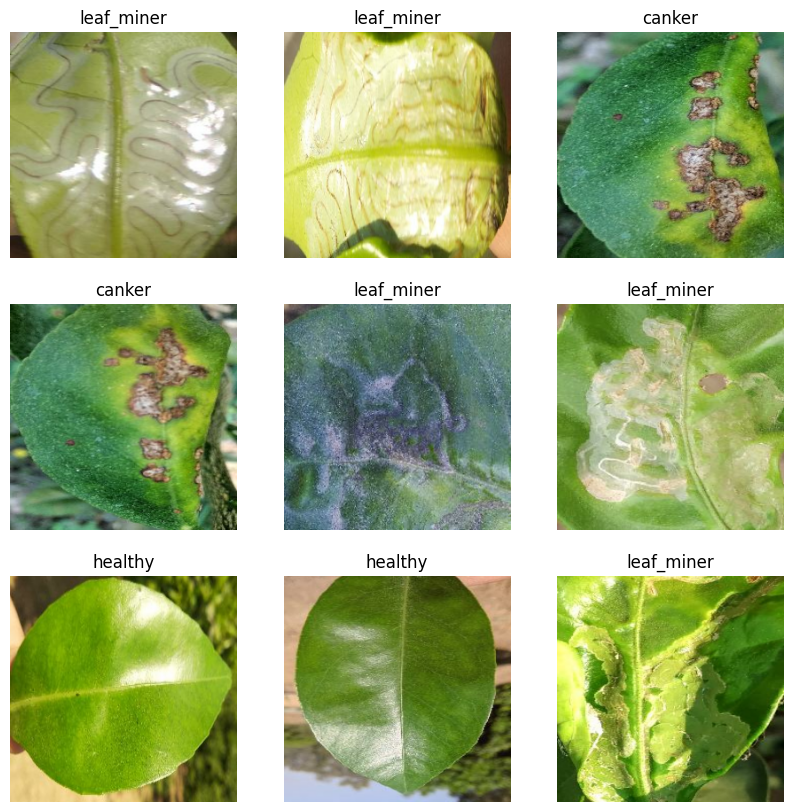

In [5]:
# visualizing the data
plt.figure(figsize=(10, 10))
for images, labels in data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

In [6]:
train_size = 0.8
len(data)*train_size
train_ds  = data.take(309)
val_ds = data.skip(309)

print(len(train_ds))
print(len(val_ds))


309
78


In [7]:
# Defining a function that take the train and validation data from the directory
def get_data_partition_tf(data,train_split = 0.8, val_split = 0.2,shuffle = True,shuffle_size = 1000):
    if shuffle:
        data = data.shuffle(shuffle_size,seed = 42)
    train_ds = data.take(int(len(data)*train_split))
    val_ds = data.skip(int(len(data)*train_split))
    return train_ds,val_ds

train_ds,val_ds = get_data_partition_tf(data)

print(len(train_ds))
print(len(val_ds))


309
78


In [8]:
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [9]:
cnn = tf.keras.models.Sequential()


cnn.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3])) # input layer
cnn.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu')) # additional convo2D layer

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))    # maxpooling layer

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')) # convo2D layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu')) # additional convo2D layer

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))  # maxpooling layer

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))  # convo2D layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu')) # additional convo2D layer

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2)) # MaxPooling Layer

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))    # Convo2D layer
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))      # additional convo2D layer

cnn.add(tf.keras.layers.Flatten())     # Flatten into single array



cnn.add(tf.keras.layers.Dense(128, activation='relu'))  # Dense layer / neurons of the network


cnn.add(tf.keras.layers.Dropout(0.4))   # Dropout layer to avoid overfitting


cnn.add(tf.keras.layers.Dense(4, activation='softmax')) # output layer


cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) # compiling the model

cnn.summary()



C:\Users\Sherazzzz\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 127, 127, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,139,220 (50.12 MB)

 Trainable params: 13,139,220 (50.12 MB)

 Non-trainable params: 0 (0.00 B)

: 

In [12]:
history = cnn.fit(
        x = train_ds,
        validation_data = val_ds,
        epochs = 10,
        verbose = 1
        )

Epoch 1/10


In [11]:
# #Training set Accuracy
train_loss, train_acc = cnn.evaluate(train_ds)
print('Training accuracy:', train_acc)
# #Validation set Accuracy
val_loss, val_acc = cnn.evaluate(val_ds)
print('Validation accuracy:', val_acc)

309/309 ━━━━━━━━━━━━━━━━━━━━ 351s 567ms/step - accuracy: 0.9967 - loss: 0.0122
Training accuracy: 0.9970671534538269
78/78 ━━━━━━━━━━━━━━━━━━━━ 228s 869ms/step - accuracy: 0.9967 - loss: 0.0099
Validation accuracy: 0.9963942170143127


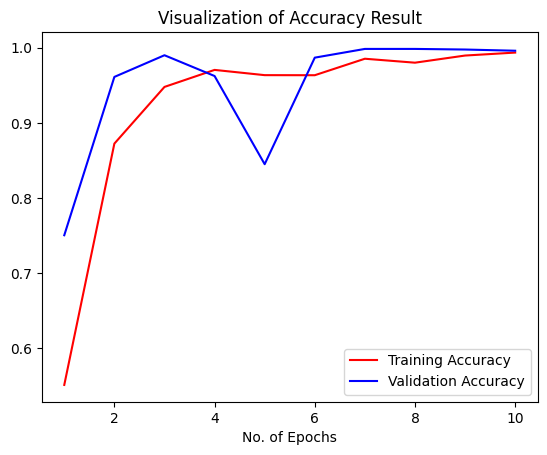

In [12]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [15]:
cnn.save("mymodel.h5")
cnn.save("mymodel.keras")